<a href="https://colab.research.google.com/github/jh941213/crawling/blob/main/6_selenium%E1%84%8B%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%83%E1%85%A9%E1%86%BC%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%8F%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AF%E1%84%85%E1%85%B5%E1%86%BC(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11. selenium을 이용한 동적크롤링(2)

## 1번. selenium 코드 응용

### 1-1. selenium을 사용하기 위해 필요한 모듈을 설치해준다.

In [ ]:
import sys

# install chromium, its driver, and selenium
if 'google.colab' in sys.modules:
    !apt-get update
    !apt install chromium-chromedriver
    !cp /usr/lib/chromium-browser/chromedriver /usr/bin
    !pip install selenium

# set options to be headless, ..
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup
import re

if 'ipykernel' in sys.modules:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver', options=options)

### 1-2. selenium의 기본 사용 코드는 다음과 같다.
#### (1) 엘레멘트 접근 방법
다양한 방법으로 엘레멘트에 접근할 수 있지만 주로 xpath를 사용한다.

주의 : class name에 띄어쓰기가 포함되어 있다면 띄어쓰기 대신 온점('.')으로 꼭 입력해주어야 한다.

(ex. 'sub_time suv_txt' => 'sub_time.suv_text' )

In [ ]:
# xpath
driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[3]/form/fieldset/button/span[2]')
# class속성
driver.find_element_by_class_name('ico_search_submit')
# id속성
driver.find_element_by_id('ke_kbd_btn')
# 링크가 있는 텍스트
driver.find_element_by_link_text('회원가입')
# css 셀렉터
driver.find_element_by_css_selector('#account > div > a')
# name 속성
driver.find_element_by_name('join') 
# 링크가 있는 텍스트 일부
driver.find_element_by_partial_link_text('가입')
# 태그 이름
driver.find_element_by_tag_name('input')
# 속성값 가져오기
driver.get_attribute('href')

# <응용>
# 상위태그 + 하위태그
driver.find_element_by_tag_name('input').find_element_by_tag_name('a')
# xpath 로 접근한 엘레먼트의 안에 join 이라는 속성을 가진 tag 엘레먼트에 접근
driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[3]/form/fieldset/button/span[2]').find_element_by_name('join') 

#### (2) 엘레멘트 클릭 / 텍스트 입력 & 삭제
검색창에 텍스트를 입력하고 버튼을 클릭하는 과정을 통해 url 입력 필요없이 다른 페이지로 넘어갈 수 있다.
- 엘레멘트 클릭 => click()
- 텍스트 입력 => send_keys()
- 텍스트 삭제 => clear()

In [ ]:
# 텍스트 입력 
driver.find_element_by_class_name('input_text').send_keys('코로나')
# 텍스트 삭제
driver.find_element_by_class_name('input_text').clear() 


# 검색버튼 누르기
# 1번째 방법
driver.find_element_by_xpath('//*[@id="search_btn"]/span[2]').click()

# 2번째 방법
driver.find_element_by_class_name('input_text').send_keys('\n')
# >> 우리가 흔히 검색어를 입력하고 엔터를 치면 검색이 되듯이
#    엔터('\n')를 send_keys()로 입력하면 검색버튼을 누르는 것과 동일하게 된다.

#### (3) 뒤로가기 or 앞으로가기
이전 페이지로 돌아가거나 앞 페이지로 갈 수 있다.

In [ ]:
# 뒤로가기
driver.back()

#앞으로 가기
driver.forward()

#### (4) 스크린샷 찍기
특정 엘레멘트의 스크린샷을 찍어 이미지 파일로 저장이 가능하다.

In [ ]:
#웹페이지 전체 캡쳐
driver.save_screenshot('webpage.png')

#특정 엘레먼트 캡쳐
element = driver.find_element_by_class_name('ico.search_submit')
element.screenshot_as_png

## 2. selenium으로 네이버에 직접 키워드 입력하여 연관검색어 찾기

### 2-1.네이버 홈페이지에서 selenium을 이용하여 **검색창에 키워드를 입력**시킨 뒤 검색된 페이지로 넘어간다.

In [ ]:
import time

driver = webdriver.Chrome('chromedriver', options=options)

url = 'https://www.naver.com'

driver.get(url)

# 검색어 입력
driver.find_element_by_class_name('input_text').send_keys('코로나')

# 검색버튼 누르기
driver.find_element_by_xpath('//*[@id="search_btn"]/span[2]').click()
# driver.find_element_by_class_name('input_text').send_keys('\n')  #다른방법
time.sleep(3)

AttributeError: ignored

### 2-2.검색된 페이지에서 **연관검색어**를 찾는다.

In [ ]:
# 연관검색어 찾기
keywords = driver.find_element_by_class_name('lst_related_srch._list_box').text
print(keywords)

코로나 라이브
코로나 확진자
코로나 4단계 연장
코로나 거리두기
코로나 4단계
코로나 백신
코로나 단계
코로나 9시
코로나 거리두기 단계
날씨


### 2-3. 연관검색어가 있는 **엘레멘트를 캡쳐**해본다.
(한국어가 들어있는 엘레멘트 캡쳐시 한글 폰트 설치를 해주어야 한다. 설치 후에 런타임 다시 시작하기)

#### 한글폰트설치

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148854 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


#### 연관 검색어 캡쳐하기
아래 코드를 실행한 뒤 저장된 파일을 열어보면 캡쳐된 연관검색어 이미지를 확인할 수 있다.

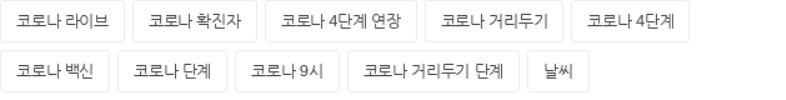

In [ ]:
element = driver.find_element_by_class_name('lst_related_srch._list_box')
element_png = element.screenshot_as_png
with open('keywords.png','wb') as file :
    file.write(element_png)

In [ ]:
driver.save_screenshot('webpage.png')

True

### 2-4. 페이지를 다시 **뒤로 돌아간 뒤**, 다른 키워드를 입력하고 연관검색어를 크롤링한다.

In [ ]:
# 뒤로가기
driver.back() # >> 네이버 홈 화면으로 돌아감

# 검색어 입력
driver.find_element_by_class_name('input_text').send_keys('백신접종')

# 검색버튼 누르기
driver.find_element_by_xpath('//*[@id="search_btn"]/span[2]').click()
# driver.find_element_by_class_name('input_text').send_keys('\n')  #다른방법
time.sleep(3)

# 연관검색어 찾기
keywords = driver.find_element_by_class_name('lst_related_srch._list_box').text
print(keywords)

백신접종예약
백신
코로나백신접종예약
백신 접종률
백신예약
코로나 백신 접종
코로나19 백신
백신접종 증명서
백신접종확인


### 2-5. 이번에는 키워드가 검색된 페이지에서 검색창에 있는 **검색어를 지운 뒤** 다른 키워드를 입력해서 검색해본다.

In [ ]:
# 기존 검색어 삭제
driver.find_element_by_class_name('box_window').clear() 

# 새로운 검색어 입력
driver.find_element_by_class_name('box_window').send_keys('자가격리')

# 검색 버튼 누르기
driver.find_element_by_class_name('box_window').send_keys('\n')
time.sleep(3)

# 연관검색어 찾기
keywords = driver.find_element_by_class_name('lst_related_srch._list_box').text
print(keywords)

자가격리 기준
자가격리 지원금
자가격리 가족
자가격리 구호물품
자가격리 영어로
자가격리 면제
자가격리 신청
자가격리 뜻
자가격리 위반


### 2-6. **find_by_element_by_link_text** 을 이용하여 연관검색어 중 하나의 연관검색어를 클릭한 뒤 그 연관검색어에 대한 또 다른 연관검색어를 크롤링해본다.
find_by_element_by_link_text 는 링크를 갖고 있는 (보여지는)텍스트 값을 이용해서 엘레멘트를 찾는 코드이다. 따라서 잘만 이용하면 xpath를 복사하는 것 보다 훨씬 수원해진다.

In [ ]:
driver.find_element_by_link_text('자가격리 지원금').click()

# 연관검색어 찾기
keywords = driver.find_element_by_class_name('lst_related_srch._list_box').text
print(keywords)

코로나 자가격리 지원금 신청
자가격리 지원금 신청
자가격리 지원금 기준
고등학생 자가격리 지원금
자가격리 구호물품
자가격리 기준
